### Imports

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

from oak_cli.utils.logging import logger
from oak_cli.evaluation.localhost_resources.common import EVALUATION_CSV, ExperimentCSVKeys
from oak_cli.evaluation.localhost_resources.graph_utils import CPU_AND_MEMORY_KEYS, get_experiment_duration_label, apply_rolling_window

### Constants

### Settings

In [56]:
USE_MINUTES = True

USE_ROLLING_WINDOW = False
ROLLING_WINDOW_SIZE = 10
USE_MEAN = True # Otherwise Median will be used

### Error Handing & Checking

In [57]:
if not EVALUATION_CSV.exists():
    logger.error(f"{EVALUATION_CSV} does not exist yet!")
    sys.exit(1)

### Common Graph Configuration

In [58]:
# Load the CSV file into a DataFrame
df = pd.read_csv(EVALUATION_CSV)

df.set_index(ExperimentCSVKeys.TIME_SINCE_START.value, inplace=True)

if USE_MINUTES:
    df.index = df.index / 60

### Common Graph Styling

In [59]:
sns.set_style("whitegrid")

# Graphs Drawing

### 0-100 % Resources

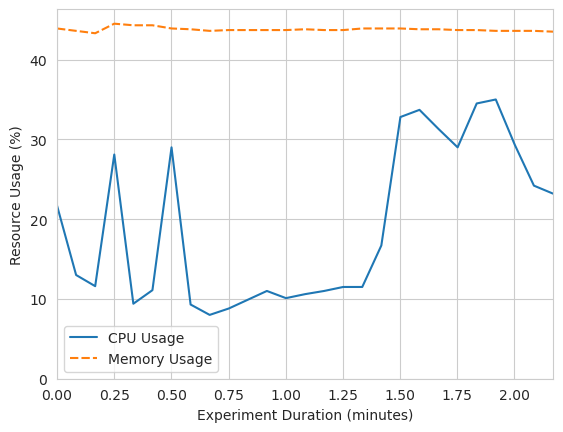

In [60]:
if USE_ROLLING_WINDOW:
    apply_rolling_window(df=df, keys=CPU_AND_MEMORY_KEYS)

sns.lineplot(data=df[CPU_AND_MEMORY_KEYS])

plt.xlabel(get_experiment_duration_label())
plt.ylabel("Resource Usage (%)")

plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()

### Disk Space Changes

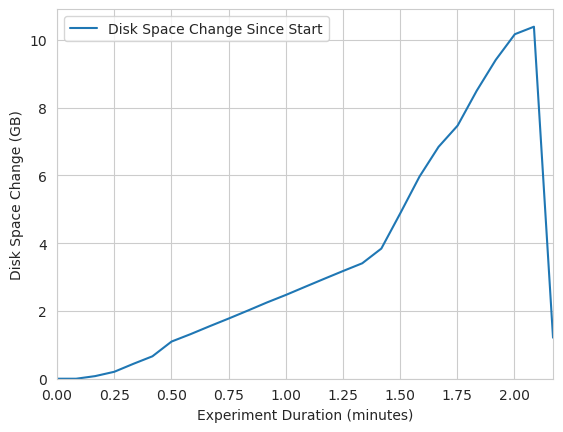

In [61]:
disk_space_change_since_last_measurement_key = ExperimentCSVKeys.DISK_SPACE_CHANGE_SINCE_START.value

if USE_ROLLING_WINDOW:
    apply_rolling_window(df=df, keys=[disk_space_change_since_last_measurement_key])

# Note: Change MB to GB
df[[disk_space_change_since_last_measurement_key]] = df[[disk_space_change_since_last_measurement_key]] / 1024
sns.lineplot(data=df[[disk_space_change_since_last_measurement_key]])
plt.xlabel(get_experiment_duration_label())
plt.ylabel("Disk Space Change (GB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()

In [62]:
disk_space_change_since_last_measurement_key = ExperimentCSVKeys.DISK_SPACE_CHANGE_SINCE_LAST_MEASUREMENT.value

if USE_ROLLING_WINDOW:
    apply_rolling_window(df=df, keys=[disk_space_change_since_last_measurement_key])

# Note: Change MB to GB
df[[disk_space_change_since_last_measurement_key]] = df[[disk_space_change_since_last_measurement_key]] / 1024
sns.lineplot(data=df[[disk_space_change_since_last_measurement_key]])
plt.xlabel(get_experiment_duration_label())
plt.ylabel("Disk Space Change (GB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()

KeyError: "None of [Index(['Next Disk diff'], dtype='object')] are in the [columns]"

### Network

### Since Start

In [ ]:
if USE_ROLLING_WINDOW:
    tmp = df[["Net Received Delta compared to start", "Net Set Delta compared to start"]].rolling(window=ROLLING_WINDOW_SIZE)
    df[["Net Received Delta compared to start", "Net Set Delta compared to start"]] = tmp.mean() if USE_MEAN else tmp.median()

sns.lineplot(data=df[["Net Received Delta compared to start", "Net Set Delta compared to start"]] / 1024)
plt.xlabel("Experiment Duration " + "(minutes)" if USE_MINUTES else "(seconds)")
plt.ylabel("Network Change (GB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()

### Network compared: current vs last

In [ ]:
if USE_ROLLING_WINDOW:
    tmp = df[["Net Received Delta compared to last", "Net Set Delta compared to last"]].rolling(window=ROLLING_WINDOW_SIZE)
    df[["Net Received Delta compared to last", "Net Set Delta compared to last"]] = tmp.mean() if USE_MEAN else tmp.median()

sns.lineplot(data=df[["Net Received Delta compared to last", "Net Set Delta compared to last"]])
plt.xlabel("Experiment Duration " + "(minutes)" if USE_MINUTES else "(seconds)")
plt.ylabel("Network Change (MB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()